# Global Power Plant Project:

Submitted by **POOJA C** Batch No:1831.

**Statement:  The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.**

**We define the "Fuel Type" attribute of our database based on common fuel categories.**

**Prediction : Make two prediction**
  - 1) Fuel Type   
  - 2) capacity_mw

# Importing dataset:

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#To print all columns and all rows
pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

In [3]:
#importing data
df=pd.read_csv("Globalpowerplant.csv") #Reading csv file
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,NaN,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,NaN,NaN,0.994875,233.59665,865.4,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
907,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,NaN,NaN,iEnergy Wind Farms,CDM,https://cdm.unfccc.int/Projects/DB/RWTUV134503...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data description:

- country :- 3 character country code corresponding to the ISO 3166-1 alpha-3 specification.
- country_long :- longer form of the country designation.
- name :- name or title of the power plant, generally in Romanized form.
- gppd_idnr :- 10 or 12 character identifier for the power plant.
- capacity_mw :- electrical generating capacity in megawatts.
- latitude :- geolocation in decimal degrees; WGS84 (EPSG:4326).
- longitude :- geolocation in decimal degrees; WGS84 (EPSG:4326).
- primary_fuel :- energy source used in primary electricity generation or export.
- other_fuel1 :- energy source used in electricity generation or export.
- other_fuel2 :- energy source used in electricity generation or export.
- other_fuel3 :- energy source used in electricity generation or export.
- commissioning_year :- year of plant operation, weighted by unit-capacity when data is available.
- owner :- majority shareholder of the power plant, generally in Romanized form.
- source :- entity reporting the data; could be an organization, report, or document, generally in Romanized form.
- url :- web document corresponding to the source field.
- geolocation_source :- attribution for geolocation information.
- wepp_id :- a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- year_of_capacity_data :- year the capacity information was reported.
- generation_gwh_2013 :- electricity generation in gigawatt-hours reported for the year 2013.
- generation_gwh_2014 :- electricity generation in gigawatt-hours reported for the year 2014.
- generation_gwh_2015 :- electricity generation in gigawatt-hours reported for the year 2015.
- generation_gwh_2016 :- electricity generation in gigawatt-hours reported for the year 2016.
- generation_gwh_2017 :- electricity generation in gigawatt-hours reported for the year 2017.
- generation_data_source :- attribution for the reported generation information.
- estimated_generation_gwh :- estimated annual electricity generation in gigawatt-hours.

**In this perticular problem i have two targets i have to find out predictions for Fuel type and capacity_mw**.

- If i consider Fuel type as target then i have to take classification models to predict.
- If i consider capacity_mw as target then i have to take Regression models to predict.

In [4]:
#Lets rename the column primary_fuel with Fuel_type as in the statement it is asked to predict Fuel_type
df.rename(columns={'primary_fuel':'Fuel_type'},inplace=True)

# EDA:

In [5]:
#Checking shape of dataset
df.shape

(908, 25)

In this perticular dataset i have 908 rows and 25 columns.

In [6]:
#Checking all column names
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'Fuel_type', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

Above are the column names of my dataset.

In [7]:
#Checking the data types of all columns
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
Fuel_type                    object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

Above are the data types of each column in the dataset.

In [8]:
#Checking the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   Fuel_type                 908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

- I can clearly observe that there are some null values in some columns of the dataset.
- other_fuel3, wepp_id and estimated_generation_gwh has all NaN values keeping all the values in a column as NaN has no meaning so i can drop these 3 columns.
- other_fuel2 has only one non null value which means all other values are NaN so this column also has nothing to do with my data training.

In [9]:
#Droping unnecessary columns
df = df.drop(["other_fuel3"],axis=1)
df = df.drop(["wepp_id"],axis=1)
df = df.drop(["estimated_generation_gwh"],axis=1)
df = df.drop(["other_fuel2"],axis=1)

In [10]:
#Checking unique values of each column
df.nunique()

country                     1
country_long                1
name                      908
gppd_idnr                 908
capacity_mw               365
latitude                  837
longitude                 828
Fuel_type                   8
other_fuel1                 3
commissioning_year         73
owner                     280
source                    191
url                       304
geolocation_source          3
year_of_capacity_data       1
generation_gwh_2013       364
generation_gwh_2014       374
generation_gwh_2015       398
generation_gwh_2016       405
generation_gwh_2017       410
generation_data_source      1
dtype: int64

country, country_long, year_of_capacity_data and generation_data_source has only one unique count which means all the values of the column are same so no need to keep all these columns unnecessarily.

In [11]:
#Droping unnecessary columns
df = df.drop(["country"],axis=1)
df = df.drop(["country_long"],axis=1)
df = df.drop(["year_of_capacity_data"],axis=1)
df = df.drop(["generation_data_source"],axis=1)

In [12]:
#Printing the data set after removing columns
df.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,Fuel_type,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,631.777928,617.789264,843.747,886.004428,663.774500
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,1668.290000,3035.550000,5916.370,6243.000000,5385.579736


In [13]:
#lets check the name column entries
df['name'].value_counts()

AKALTARA TPP                            1
Landewadi Wind Farm                     1
Askandra - Saidham Solar Power Plant    1
SANJAY BHABA                            1
FARAKKA STPS                            1
                                       ..
PARICHA                                 1
Thimmapuram Wind Farm                   1
JOG                                     1
HAZIRA-GSECL                            1
Patan Taluka Wind Farm                  1
Name: name, Length: 908, dtype: int64

Name column has all the values unique.And this name column will not contribute any thing in my model training.So let me drop it.

In [14]:
#lets check the gppd_idnr column entries
df['gppd_idnr'].value_counts()

WRI1026099    1
WRI1026202    1
IND0000181    1
WRI1026676    1
WRI1019888    1
             ..
WRI1026351    1
IND0000495    1
WRI1019914    1
WRI1019916    1
WRI1026070    1
Name: gppd_idnr, Length: 908, dtype: int64

gppd_idnr also has all the values unique so let me drop it since it can not contribute to model training.

In [15]:
#lets check entries in source column
df["source"].value_counts()

Central Electricity Authority                                  520
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Rswm Rswm ltd                                                    1
Mangalore & petrochem                                            1
Mysore Mills ltd                                                 1
Chambal & chem                                                   1
Name: source, Length: 191, dtype: int64

In [16]:
#lets check entries in source column
df["owner"].value_counts()

Sterling Agro Industries ltd.                 4
Acc Acc ltd                                   4
Jk Cement ltd                                 4
Enercon India Ltd.                            3
Hindustan Zinc ltd                            3
                                             ..
Purti Sugar ltd                               1
Karur Textile Park limited                    1
Rajasthan State Mines and Minerals Limited    1
Technocraft Technocraft group                 1
Sunkon Energy Private Limited                 1
Name: owner, Length: 280, dtype: int64

Owner also looks like an unnecessary column since keeping all owner names will never distrub or give inputs to my prediction so i think i have to drop this column.

And url column also has no input for prediction ao i can this column as well.

In [17]:
#Droping unnecessary columns
df = df.drop(["name"],axis=1)
df = df.drop(["gppd_idnr"],axis=1)
df = df.drop(["url"],axis=1)
df = df.drop(["owner"],axis=1)

In [18]:
#Printing the data set after removing columns
df.head()

,capacity_mw,latitude,longitude,Fuel_type,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,WRI,631.777928,617.789264,843.747,886.004428,663.774500
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370,6243.000000,5385.579736


In [19]:
#Checking the value counts of commissioning_year
df["commissioning_year"].value_counts()

2013.0    28
2015.0    26
2012.0    23
2016.0    21
2014.0    17
          ..
1939.0     1
1927.0     1
1949.0     1
1956.0     1
1969.0     1
Name: commissioning_year, Length: 73, dtype: int64

In [20]:
#Checking null values in the dataset
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
Fuel_type                0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2013    524
generation_gwh_2014    507
generation_gwh_2015    483
generation_gwh_2016    471
generation_gwh_2017    465
dtype: int64

There are null values in all columns except capacity_mw and Fuel_type.

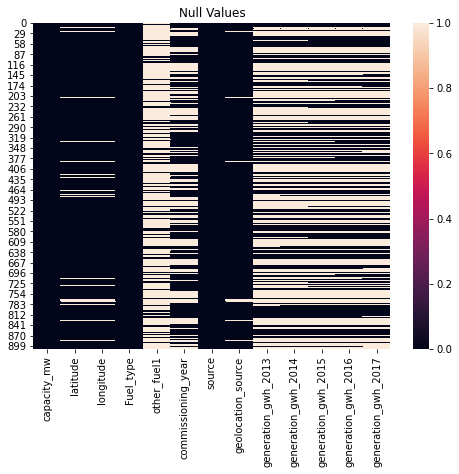

In [21]:
#Visualizeing null values
plt.figure(figsize=[8,6])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

I can notice a huge amount of null values in almost all columns except 2 columns, so i have treat them using imputation technique.

## Feature engineering:

In [22]:
#Lets extract Power_plant_age from commissioning_year by subtracting it from 2018
df['Power_plant_age'] = 2018 - df['commissioning_year']
df.drop(columns=["commissioning_year"],inplace=True)

I have extracted Power_plant_age column from commissioning_year column and droped commissioning_year.I think Power_plant_age may contribute more than commissioning_year for our prediction.

## Imputation technique to replace NaN values: 

In [23]:
#Checking for skewness
df.skew()

capacity_mw            3.193257
latitude              -0.143622
longitude              1.100942
generation_gwh_2013    3.416338
generation_gwh_2014    3.357683
generation_gwh_2015    3.679016
generation_gwh_2016    3.524785
generation_gwh_2017    3.576849
Power_plant_age        1.056132
dtype: float64

Except latitude all other columns are skewed.So in all other numerical columns i have to replace the NaN values with median.In latitude column i can replace NaN by mean.

In [24]:
#Replacing NaN values in numerical columns
df["latitude"] = df["latitude"].fillna(df["latitude"].mean())
df["longitude"] = df["longitude"].fillna(df["longitude"].median())
df["Power_plant_age"] = df["Power_plant_age"].fillna(df["Power_plant_age"].median())
df["generation_gwh_2013"] = df["generation_gwh_2013"].fillna(df["generation_gwh_2013"].median())
df["generation_gwh_2014"] = df["generation_gwh_2014"].fillna(df["generation_gwh_2014"].median())
df["generation_gwh_2015"] = df["generation_gwh_2015"].fillna(df["generation_gwh_2015"].median())
df["generation_gwh_2016"] = df["generation_gwh_2016"].fillna(df["generation_gwh_2016"].median())
df["generation_gwh_2017"] = df["generation_gwh_2017"].fillna(df["generation_gwh_2017"].median())

In [25]:
#Replacing null values in categorical columns
df["other_fuel1"] = df["other_fuel1"].fillna(df["other_fuel1"].mode()[0])
df["geolocation_source"] = df["geolocation_source"].fillna(df["geolocation_source"].mode()[0])

I have replaced all the null values in all columns.

In [26]:
#Checking null values after imputing
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
Fuel_type              0
other_fuel1            0
source                 0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
Power_plant_age        0
dtype: int64

Now i don't have any null values in my dataset.

In [27]:
#Printing the dataset after replacing all nan values
df

,capacity_mw,latitude,longitude,Fuel_type,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,797.063475,805.760000,701.027250,716.728350,807.601700,7.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,797.063475,805.760000,701.027250,716.728350,807.601700,18.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,797.063475,805.760000,701.027250,716.728350,807.601700,18.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,631.777928,617.789264,843.747000,886.004428,663.774500,14.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,Oil,Central Electricity Authority,WRI,797.063475,805.760000,0.994875,233.596650,865.400000,2.0
904,3.0,12.8932,78.1654,Solar,Oil,Karnataka Power Corporation Limited,Industry About,797.063475,805.760000,701.027250,716.728350,807.601700,18.0
905,25.5,15.2758,75.5811,Wind,Oil,CDM,WRI,797.063475,805.760000,701.027250,716.728350,807.601700,18.0
906,80.0,24.3500,73.7477,Coal,Oil,Hindustan Zinc ltd,WRI,797.063475,805.760000,701.027250,716.728350,807.601700,18.0


This is my dataset after removing all null values using imputation technique.

In [28]:
#Checking unique values of target column
df['capacity_mw'].unique()

array([2.50000e+00, 9.80000e+01, 3.92000e+01, 1.35000e+02, 1.80000e+03,
       2.50000e+02, 6.00000e+01, 1.92000e+02, 2.90000e+02, 2.10000e+02,
       1.35000e+03, 1.34000e+02, 1.20000e+03, 1.69500e+01, 9.00000e+00,
       2.63000e+03, 4.19330e+02, 6.00000e+02, 1.00000e+01, 1.70000e+01,
       2.40000e+01, 6.52000e+02, 4.60000e+01, 5.00000e+01, 1.00000e+00,
       1.65000e+01, 1.13600e+02, 1.98000e+01, 1.32000e+01, 5.00000e+00,
       2.00000e+02, 7.05000e+02, 2.80000e+01, 4.50000e+02, 1.80000e+02,
       1.05000e+03, 5.10000e+02, 6.75000e+01, 3.00000e+02, 4.55000e+02,
       1.20000e+01, 3.15000e+02, 3.00000e+01, 2.00000e+01, 4.20000e+01,
       7.20000e+02, 9.00000e+01, 1.32000e+03, 1.20000e+02, 6.40000e+01,
       2.70000e+02, 2.28000e+01, 1.50000e+01, 2.52000e+01, 1.80000e+01,
       1.70000e+03, 4.10000e+01, 1.32500e+03, 3.40000e+01, 1.60000e+01,
       5.00000e+02, 8.00000e+01, 7.50000e+01, 1.21000e+03, 9.90000e+01,
       6.96000e+01, 6.00000e+00, 4.00000e+01, 1.65000e+02, 7.500

Above are the unique values of capacity_mw column.

In [29]:
#Checking unique values of target column
df['Fuel_type'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

Above are the unique values of primary_fuel column.

In [30]:
#Checking for empty observations
df.loc[df['capacity_mw'] == " "]

,capacity_mw,latitude,longitude,Fuel_type,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age


There is no empty observations in capacity_mw column.

In [31]:
#Checking for empty observations
df.loc[df['Fuel_type'] == " "]

,capacity_mw,latitude,longitude,Fuel_type,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age


There is no empty observations in primary_fuel column also.

In [32]:
#Checking description of data set
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,21.196189,77.410936,1434.383254,1518.830440,1502.838018,1552.807503,1648.790766,19.816079
std,580.221767,6.088110,4.783873,2575.982982,2783.474774,2985.277178,3006.880849,3047.577626,13.085938
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,17.057825,74.390250,797.063475,805.760000,701.027250,716.728350,807.601700,15.000000
50%,60.000000,21.278850,76.719250,797.063475,805.760000,701.027250,716.728350,807.601700,18.000000
75%,388.125000,25.183775,79.211600,797.063475,805.760000,701.027250,716.728350,807.601700,21.000000
max,4760.000000,34.649000,95.408000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,91.000000


By looking into the stats of the dataset i can say that.
- All the null values has been removed.
- There is a huge difference in mean and 2nq quantile of capacity_mw column which means there are extream outliers in the column.
- Mean and 2nd quantile all other columns are almost same.
- Mean of generation_gwh_2017 is high compared to other columns which means the power production is high in 2017.

# Visualization:

# Univariate Analysis:

In [33]:
# checking for categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Fuel_type', 'other_fuel1', 'source', 'geolocation_source']


In [34]:
# Now checking for numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'Power_plant_age']


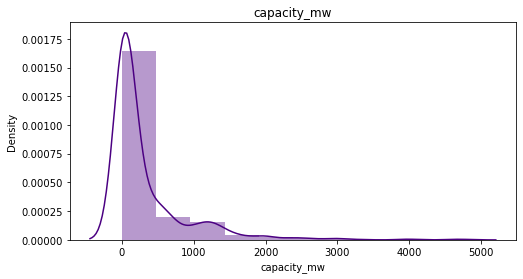

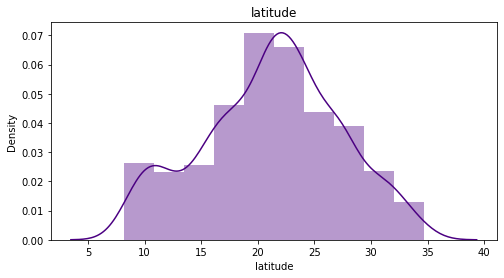

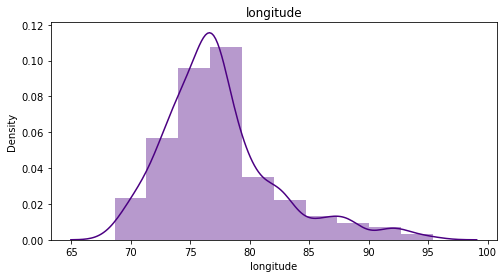

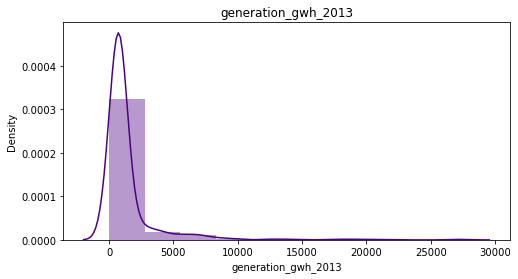

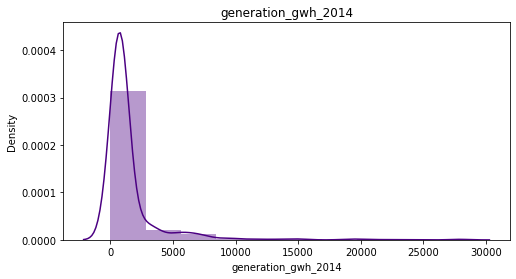

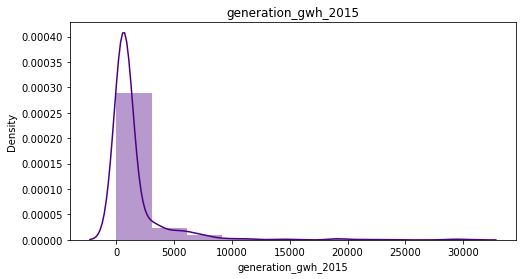

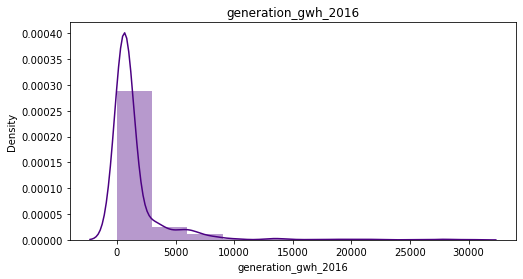

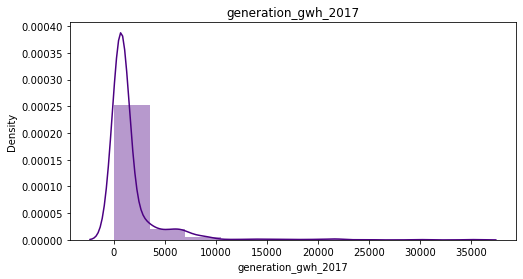

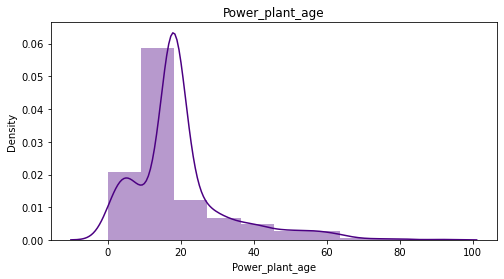

In [35]:
#Distribution plot for all numerical columns
for i in df[numerical_columns]:              
    plt.figure(figsize = (8, 4))
    sns.distplot(df[i], bins = 10, color="indigo")
    plt.title(i)
    plt.show()

All other columns except latitude in list of continuous_columns has skewness.And i have to take care of this skewness.

In [36]:
#Checking the value counts of primary_fuel column
df.Fuel_type.value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: Fuel_type, dtype: int64

Above are the value counts of Fuel_type column.

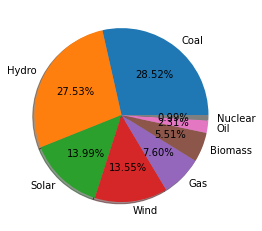

In [37]:
#Ploting pie chart for Fuel_type
labels='Coal','Hydro','Solar','Wind', 'Gas', 'Biomass', 'Oil', 'Nuclear'
fig, ax = plt.subplots()
ax.pie(df['Fuel_type'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

It looks like most of the plants in INDIA uses Coal and Hydro as there fuel.And very less plants uses Nuclear fuel.

In [38]:
#Checking the value counts of other_fuel1 column
df.other_fuel1.value_counts()

Oil             905
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

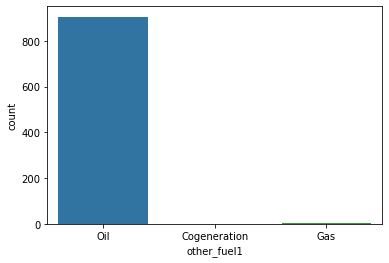

In [39]:
#Count plot for other_fuel1
sns.countplot(df['other_fuel1']);

It seems most of the plants are using Oil as the other_fuel.

In [40]:
#Checking the value counts of geolocation_source column
df.geolocation_source.value_counts()

WRI                                     785
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

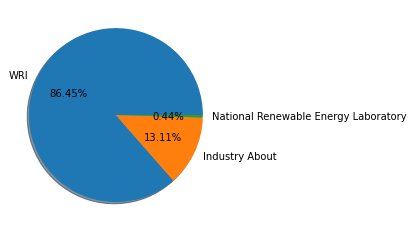

In [41]:
#Ploting pie chart for geolocation_source
labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots()
ax.pie(df['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

So maximum power plants source is WRI.And very less plants has National Renewable Energy Laboratory as source.

# Bivariate Analysis:

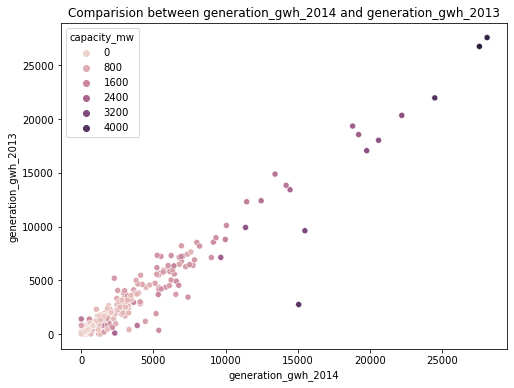

In [42]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision between generation_gwh_2014 and generation_gwh_2013')
sns.scatterplot(df['generation_gwh_2014'],df['generation_gwh_2013'],hue=df['capacity_mw']);

Here i can see a linear relationship between generation of 2013 & 2014.And also the density of points is more in between o to 5000 which means less capacity power plants are more in number.

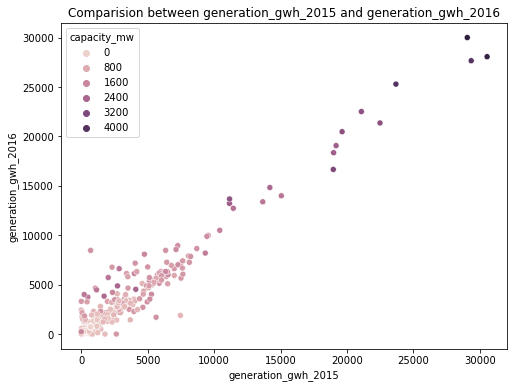

In [43]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision between generation_gwh_2015 and generation_gwh_2016')
sns.scatterplot(df['generation_gwh_2015'],df['generation_gwh_2016'],hue=df['capacity_mw']);

Here also i can see a linear relationship between generation of 2015 & 2016.And also the density of points is more in between o to 5000 which means less capacity power plants are more in number.

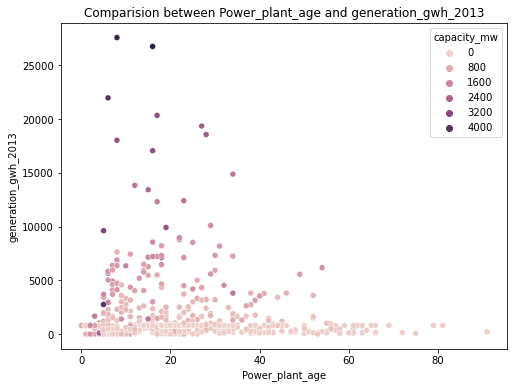

In [44]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Power_plant_age and generation_gwh_2013')
sns.scatterplot(df['Power_plant_age'],df['generation_gwh_2013'],hue=df['capacity_mw']);

It looks quite evident that if the age of power plant is more then the power generation will be less.

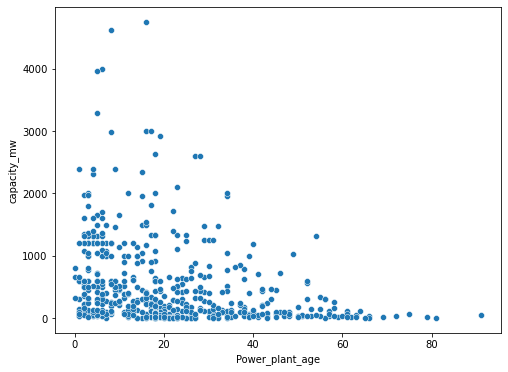

In [45]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
sns.scatterplot(x = "Power_plant_age", y = "capacity_mw", data = df)
plt.show()

From this we can say that older plants has less capacity than the plants started recently.

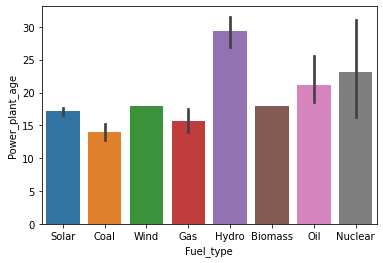

In [46]:
#Comparision between features using bar plot
sns.barplot(x = "Fuel_type", y = "Power_plant_age", data = df)
plt.show()

- The aged plants uses Hydro, Nuclear, Oil as fuels.
- The plants started recently uses Solar, Coal, Wind, Gas and Biomass as fuels.

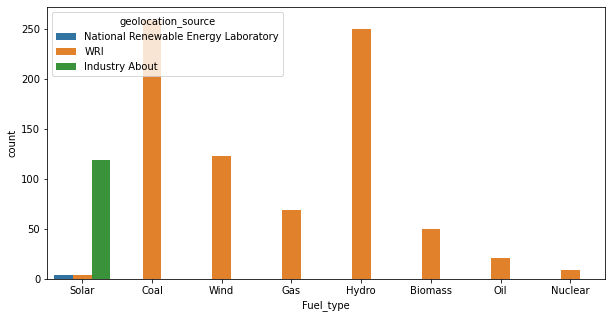

In [47]:
#Comparision between features using count plot
plt.figure(figsize = (10,5))
sns.countplot(x = "Fuel_type", hue = "geolocation_source", data = df)
plt.show()

Only in case of Solar fuel the source is of 3 types rather than that all other has WRI as geolocation_source.

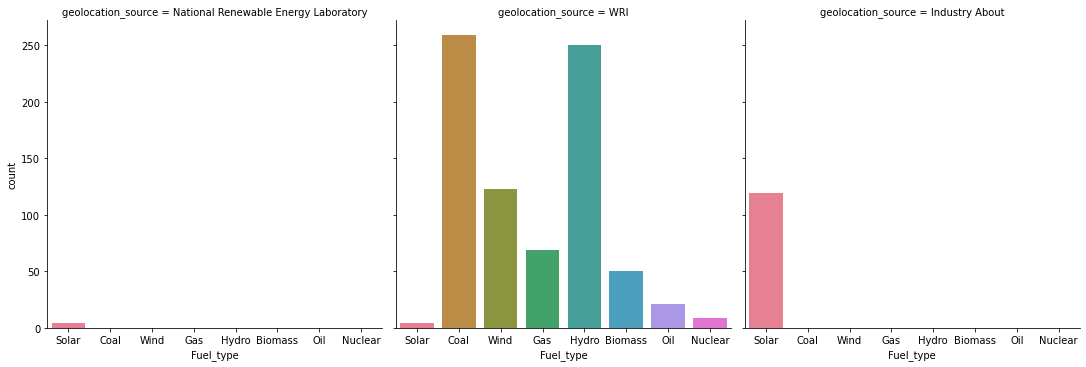

In [48]:
#Comparision between features using cat plot
sns.catplot(x='Fuel_type',col='geolocation_source',data=df,kind='count',palette="husl")

I can say that geolocation_source= WRI has all the types of fuels used bur Industry About and National Renewable Energy Laboratory has only solar as fuel.

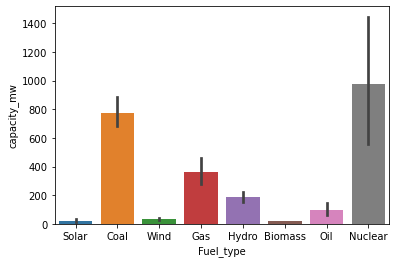

In [49]:
#Comparision between features using bar plot
sns.barplot(x = 'Fuel_type', y = 'capacity_mw', data = df)
plt.show()

The plant which uses Nuclear and Coal as fuel has more capacity than other plants uses other fuels.So to increase the power generation it is good to use Nuclear or Coal fuel.

# Multivariate Analysis:

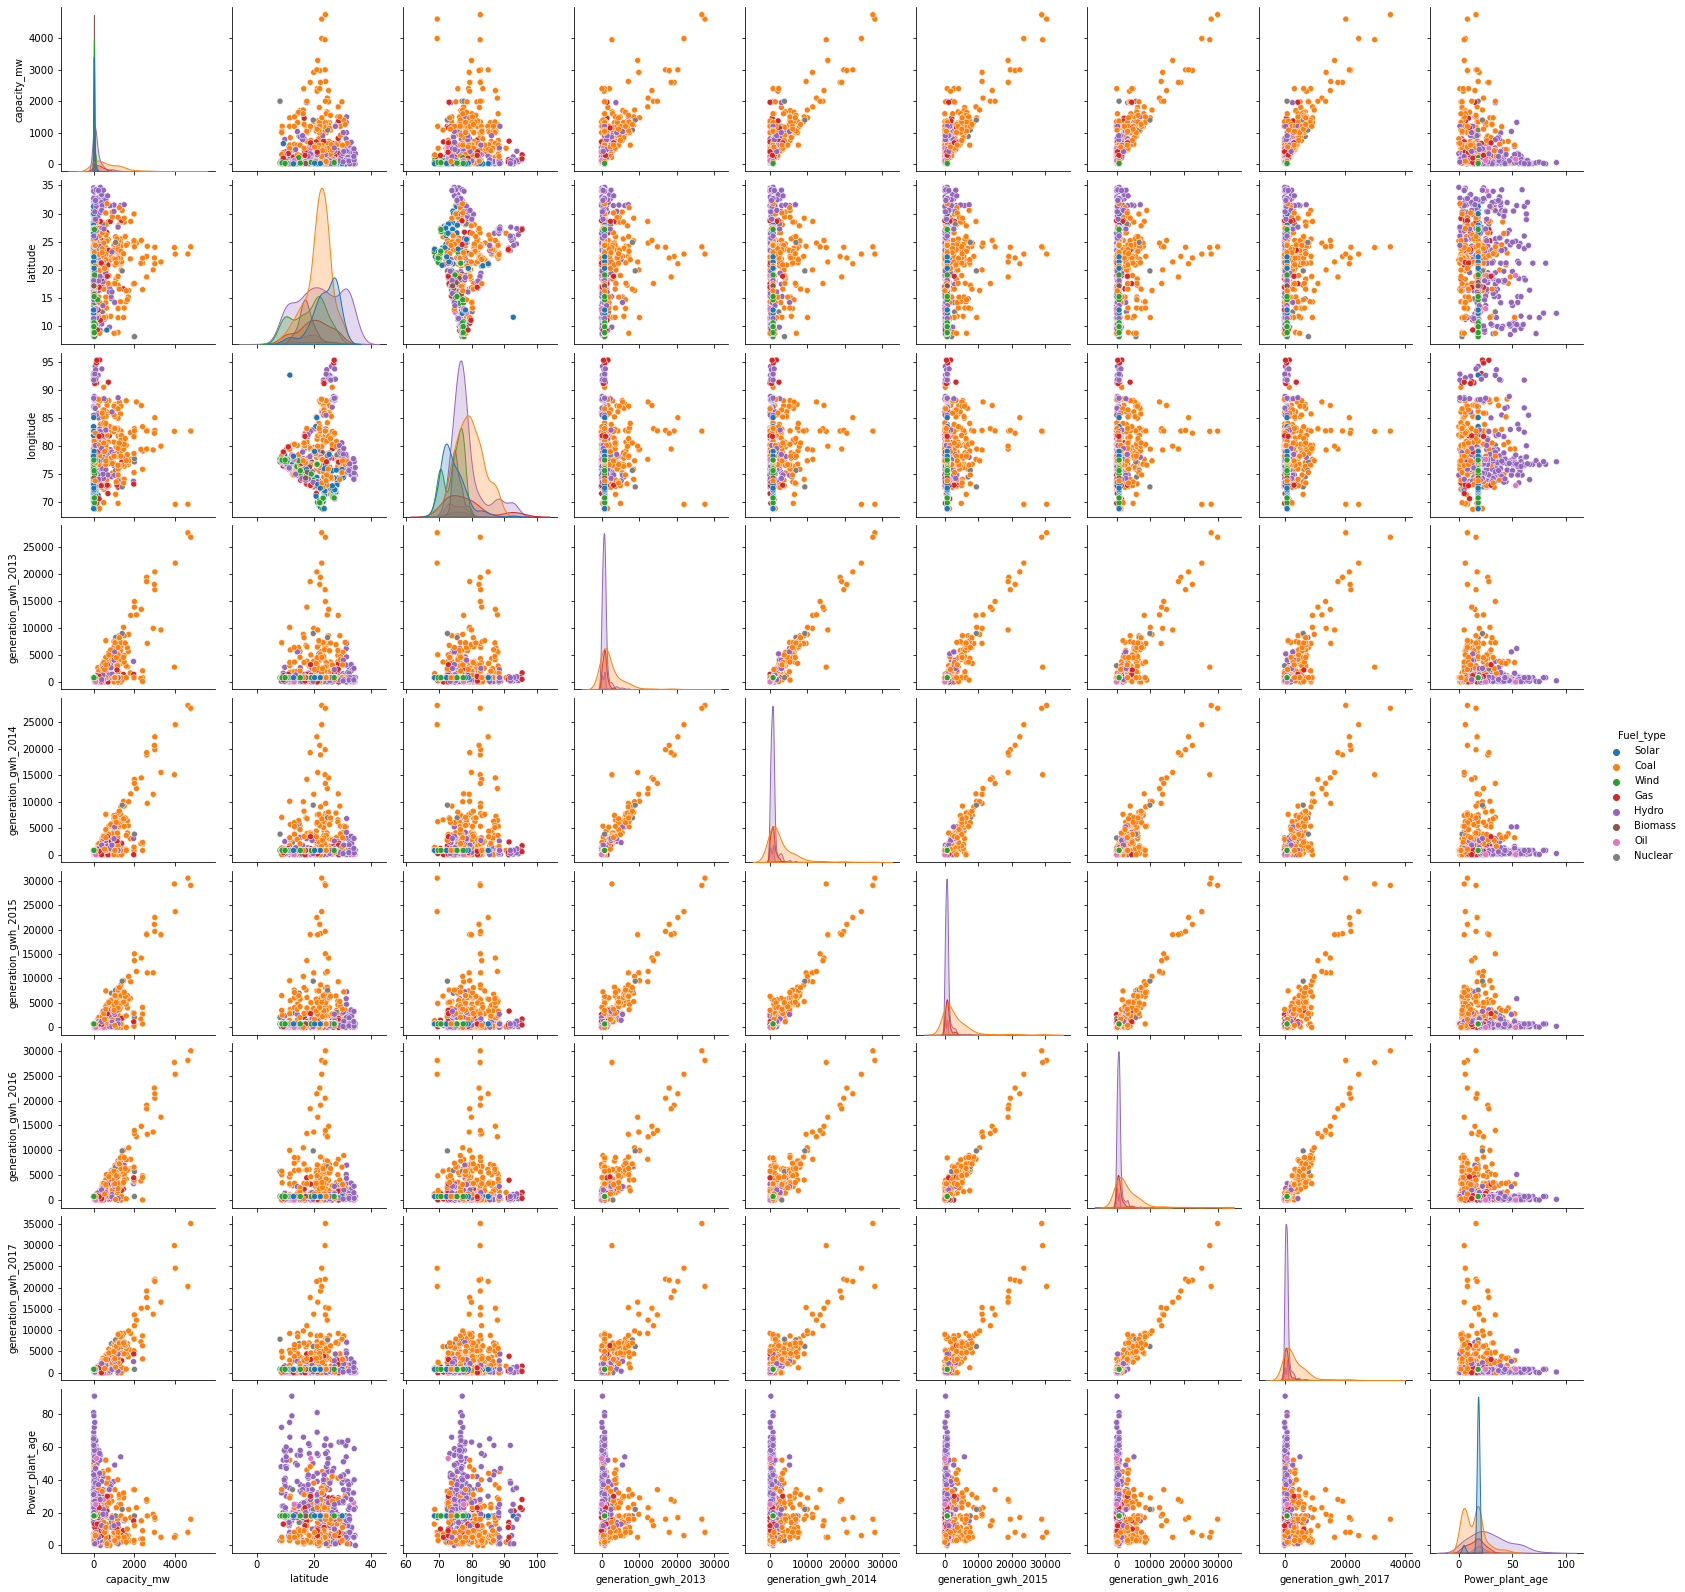

In [50]:
#pair ploting for df
sns.pairplot(df,hue="Fuel_type")

Above is the pair plot for having Fuel_type as target.There are some extreme outliers present in the dataset.

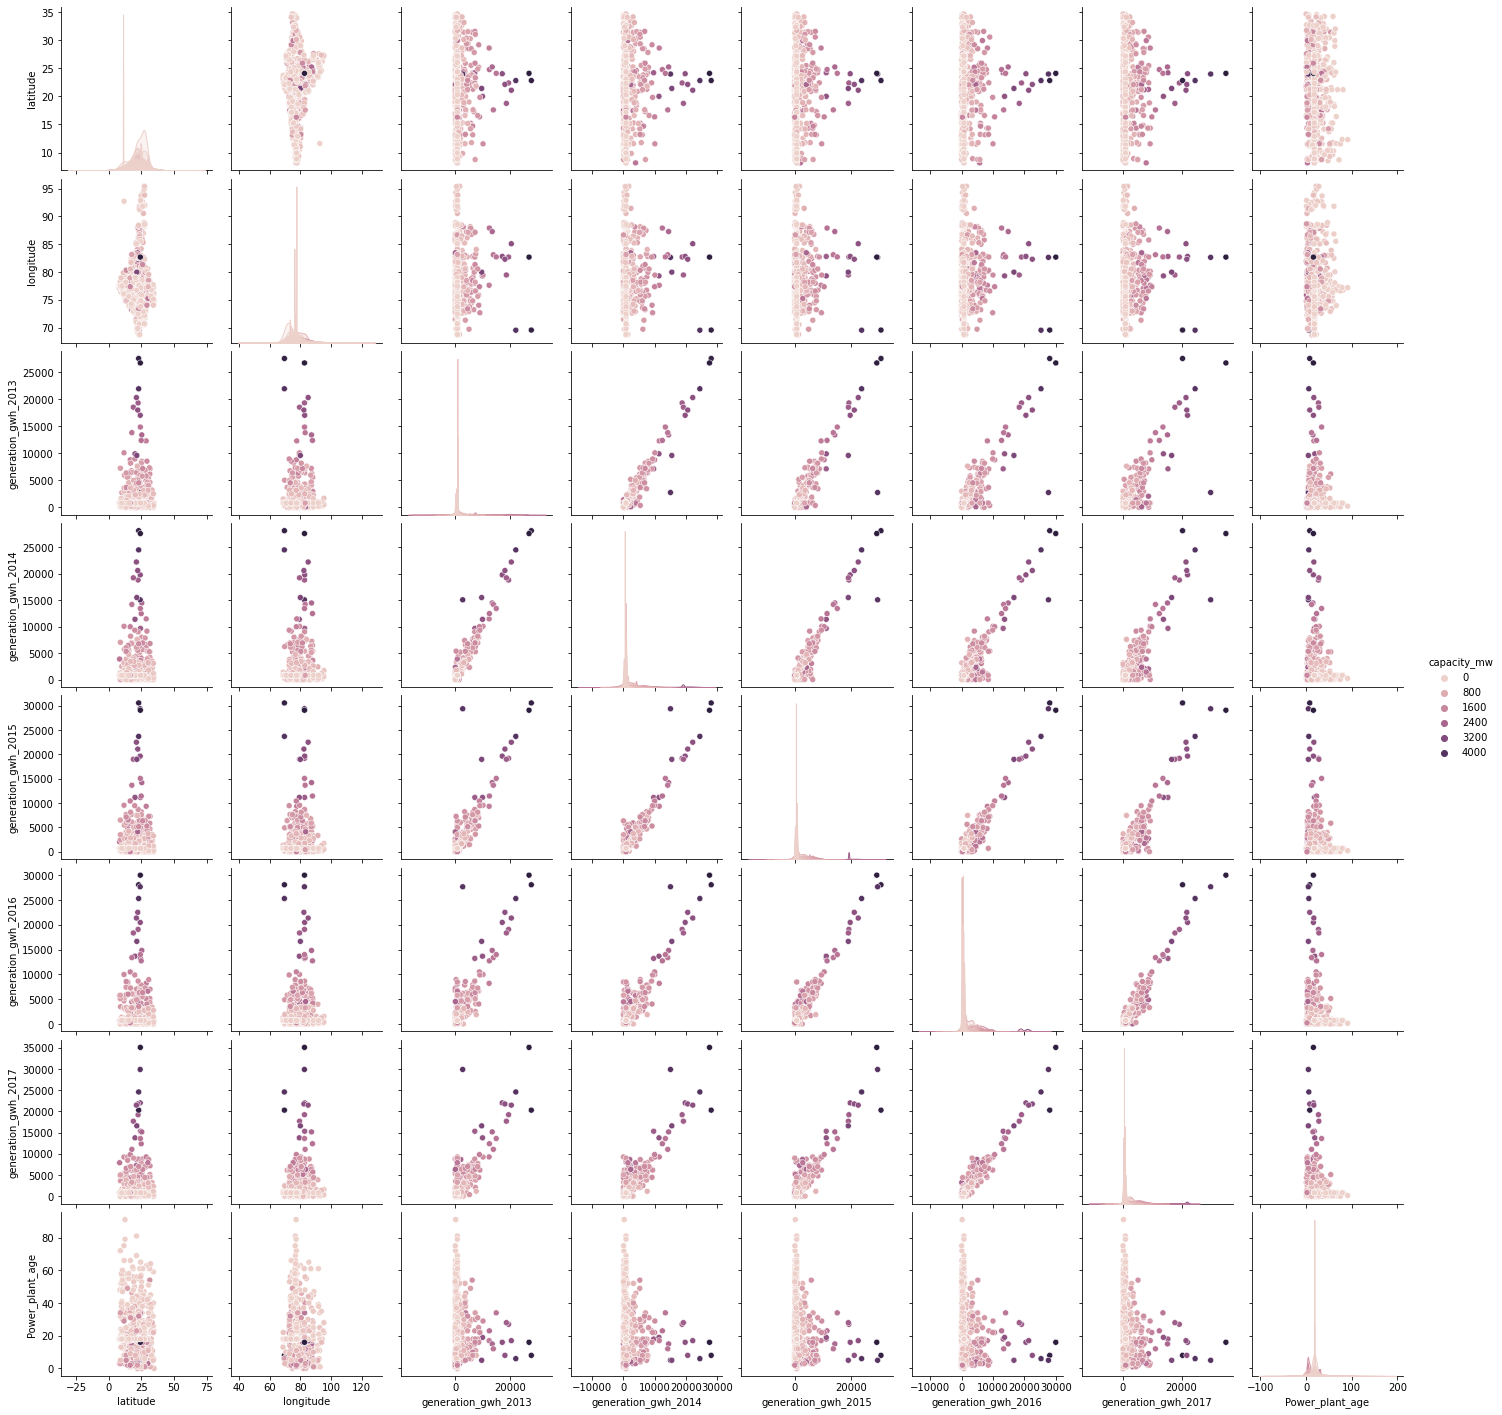

In [51]:
#pair ploting for df
sns.pairplot(df,hue="capacity_mw")

Above is the pairplot for having capacity_mw as target.Here also there are extreme outliers.

# Data Cleaning:

# Checking for outliers: 

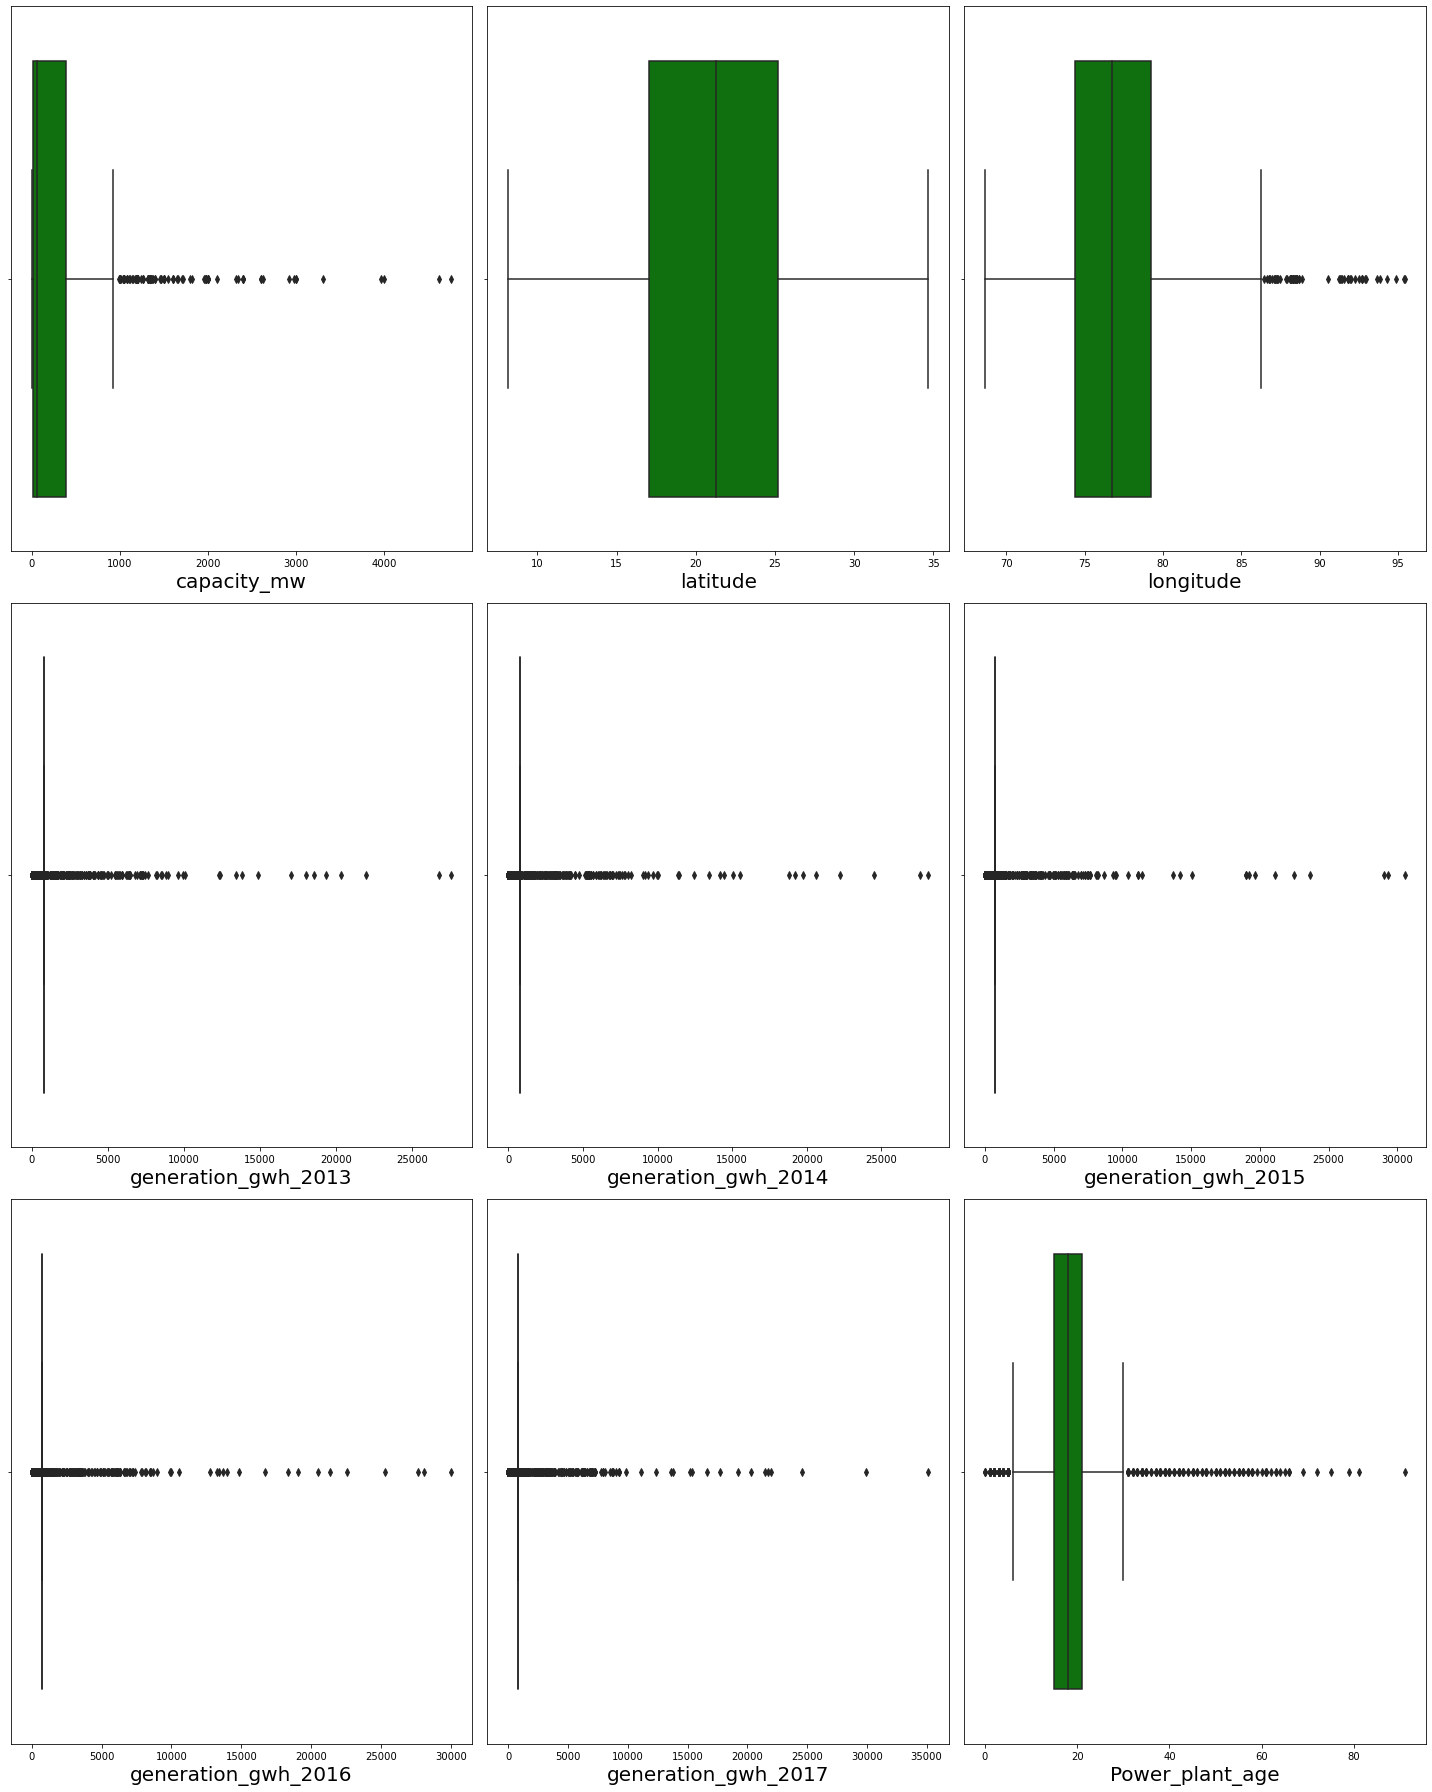

In [52]:
# Identifying the outliers using boxplot

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

There are outliers in
- longitude
- generation_gwh_2013
- generation_gwh_2014
- generation_gwh_2015
- generation_gwh_2016
- generation_gwh_2017
- Power_plant_age
- Since capacity_mw is my target no need to remove outliers in that column.

# Removing outliers:

# i) Zscore Method:

In [53]:
#Features having outliers
features=df[['longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']]

In [54]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new

,capacity_mw,latitude,longitude,Fuel_type,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,797.063475,805.760000,701.027250,716.728350,807.601700,7.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,797.063475,805.760000,701.027250,716.728350,807.601700,18.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,797.063475,805.760000,701.027250,716.728350,807.601700,18.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,631.777928,617.789264,843.747000,886.004428,663.774500,14.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,Oil,Central Electricity Authority,WRI,797.063475,805.760000,0.994875,233.596650,865.400000,2.0
904,3.0,12.8932,78.1654,Solar,Oil,Karnataka Power Corporation Limited,Industry About,797.063475,805.760000,701.027250,716.728350,807.601700,18.0
905,25.5,15.2758,75.5811,Wind,Oil,CDM,WRI,797.063475,805.760000,701.027250,716.728350,807.601700,18.0
906,80.0,24.3500,73.7477,Coal,Oil,Hindustan Zinc ltd,WRI,797.063475,805.760000,701.027250,716.728350,807.601700,18.0


I have removed the skewness using zscore method.

In [55]:
#Checking shape of new dataset
df_new.shape

(852, 13)

In my new dataset i have 852 rows and 13 columns.

In [56]:
#Checking shape of old dataset
df.shape

(908, 13)

In my old dataset i was having 908 rows and 13 columns.

In [57]:
#Checking dataloss
Dataloss = (((908-852)/908)*100)
Dataloss

6.167400881057269

Using Zscore i have 6.17% data loss.Which is less than 10%.But still let me have a look into IQR method also.

# ii) IQR method:

In [58]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

I have removed the skewness using IQR method.

In [59]:
#Checking shape of new dataset
df_1.shape

(422, 13)

After removing outliers using IQR method i got 422 rows and 13 column.

In [60]:
#Checking shape of old dataset
df.shape

(908, 13)

In my old dataset i was having 908 rows and 13 columns.

In [61]:
#Checking dataloss
Dataloss = (((908-422)/908)*100)
Dataloss

53.524229074889874

There is a great dataloss in IQR method so let me stick on to zscore method to remove outliers.

# Label Encoding:

In [62]:
cols=['Fuel_type','other_fuel1','geolocation_source','source']

I have taken all the column need to be encoded as a list cols.

In [63]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_new[cols]= df_new[cols].apply(LE.fit_transform)

In [64]:
df_new[cols].head()

,Fuel_type,other_fuel1,geolocation_source,source
0,6,2,1,109
1,1,2,2,174
2,7,2,2,21
3,2,2,2,22
4,1,2,2,22


Using label encoder i have encoded the categorical columns.

In [65]:
df_new.head()

,capacity_mw,latitude,longitude,Fuel_type,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,2.5,28.1839,73.2407,6,2,109,1,797.063475,805.760000,701.02725,716.728350,807.601700,7.0
1,98.0,24.7663,74.6090,1,2,174,2,797.063475,805.760000,701.02725,716.728350,807.601700,18.0
2,39.2,21.9038,69.3732,7,2,21,2,797.063475,805.760000,701.02725,716.728350,807.601700,18.0
3,135.0,23.8712,91.3602,2,2,22,2,631.777928,617.789264,843.74700,886.004428,663.774500,14.0
4,1800.0,21.9603,82.4091,1,2,22,2,1668.290000,3035.550000,5916.37000,6243.000000,5385.579736,3.0


This is my dataset after encoding.

# Checking the correlation using heat map:

In [66]:
cor=df_new.corr()

Checking correlation.

In [67]:
cor

,capacity_mw,latitude,longitude,Fuel_type,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
capacity_mw,1.000000,0.047883,0.269970,-0.398618,-0.002132,-0.277952,0.236602,0.575972,0.627406,0.685477,0.761222,0.800618,-0.248690
latitude,0.047883,1.000000,-0.025155,-0.006130,0.036941,0.068515,-0.201910,0.074709,0.082205,0.071786,0.057760,0.070934,-0.084720
longitude,0.269970,-0.025155,1.000000,-0.388568,0.029138,-0.234616,0.264391,0.122737,0.126913,0.163771,0.207339,0.209047,-0.107977
Fuel_type,-0.398618,-0.006130,-0.388568,1.000000,0.006390,0.039078,-0.478338,-0.232343,-0.250540,-0.277754,-0.290226,-0.291655,0.087476
other_fuel1,-0.002132,0.036941,0.029138,0.006390,1.000000,0.028433,-0.022798,0.001675,-0.000346,0.005892,0.015135,0.011855,-0.055179
source,-0.277952,0.068515,-0.234616,0.039078,0.028433,1.000000,-0.498012,-0.135116,-0.141641,-0.157690,-0.161786,-0.158162,-0.056455
geolocation_source,0.236602,-0.201910,0.264391,-0.478338,-0.022798,-0.498012,1.000000,0.108337,0.113568,0.126437,0.129721,0.126815,0.035803
generation_gwh_2013,0.575972,0.074709,0.122737,-0.232343,0.001675,-0.135116,0.108337,1.000000,0.944730,0.845955,0.730317,0.660801,-0.012797
generation_gwh_2014,0.627406,0.082205,0.126913,-0.250540,-0.000346,-0.141641,0.113568,0.944730,1.000000,0.911892,0.800808,0.742744,-0.069265
generation_gwh_2015,0.685477,0.071786,0.163771,-0.277754,0.005892,-0.157690,0.126437,0.845955,0.911892,1.000000,0.907462,0.826148,-0.141499


Above are the correlations of all the pair of features.To get better visualization on the correlation of features,let me plot it using heat map.

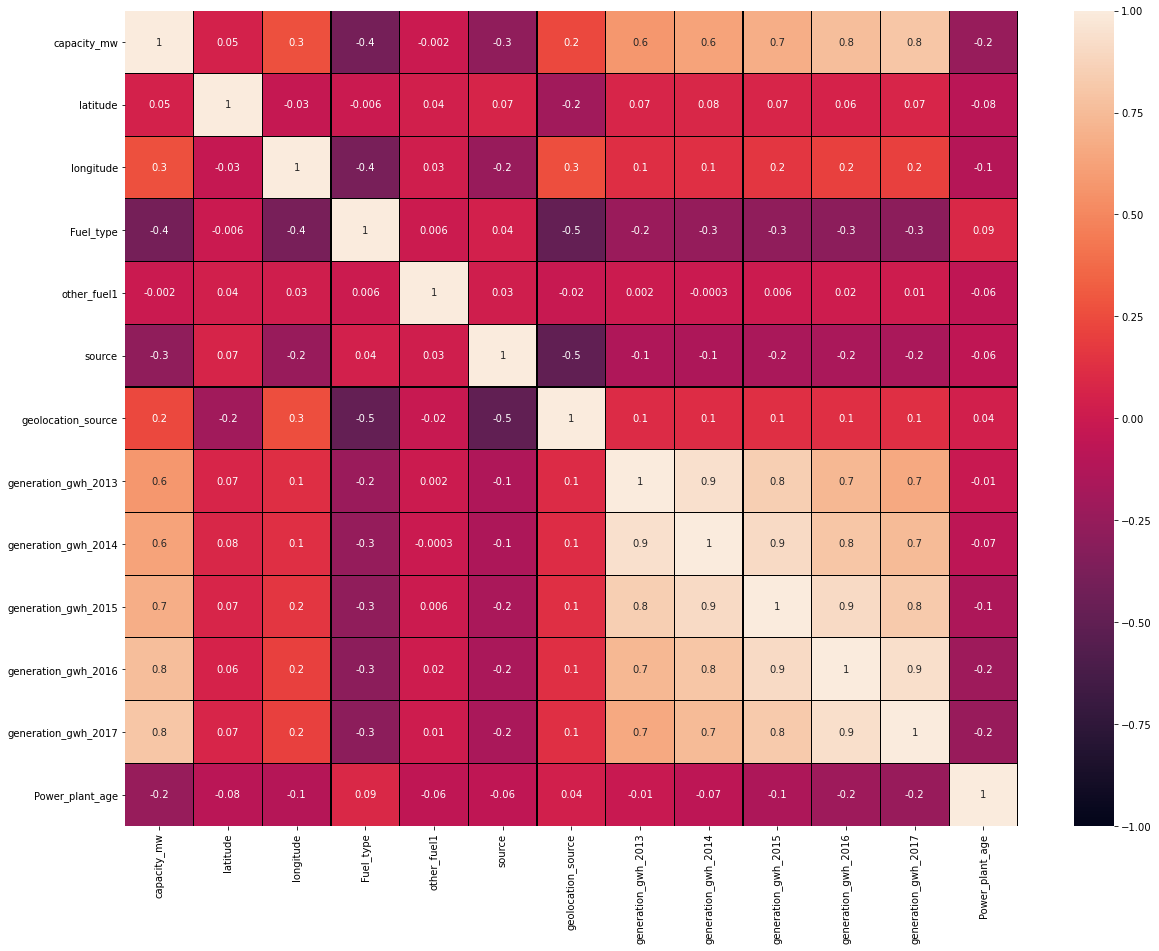

In [69]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(20,15))
sns.heatmap(df_new.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10})
plt.yticks(rotation=0);

Above are the correlations of features.I can consider that if capacity_mw is my target then
- latitude and other_fuel1 are very less correlated with capacity_mw.

If i consider Fuel_type as target then
- latitude, other_fuel1, source and Power_plant_age are very less correlated with Fuel_type.

If i consider the independent features then
- geolocation_gwh_2013 and geolocation_gwh_2014 are highly correlated.
- geolocation_gwh_2013 and geolocation_gwh_2015 are highly correlated.
- geolocation_gwh_2014 and geolocation_gwh_2015 are highly correlated.
- geolocation_gwh_2015 and geolocation_gwh_2016 are highly correlated.
- geolocation_gwh_2016 and geolocation_gwh_2014 are highly correlated.
- geolocation_gwh_2017 and geolocation_gwh_2015 are highly correlated.
- capacity_mw is highly correlated with geolocation_gwh_2016.
- capacity_mw is highly correlated with geolocation_gwh_2017.

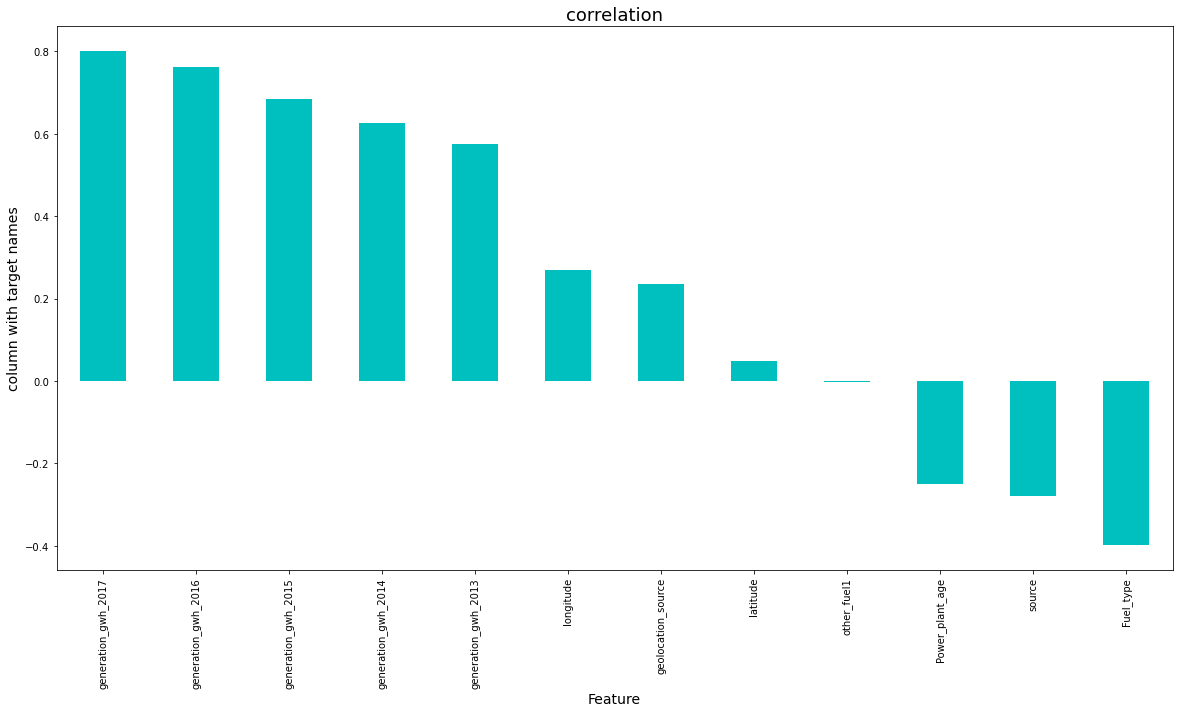

In [70]:
plt.figure(figsize=(20,10))
df_new.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

other_fuel1 and latitude is very less correlated with capacity_mw so let me drop it.

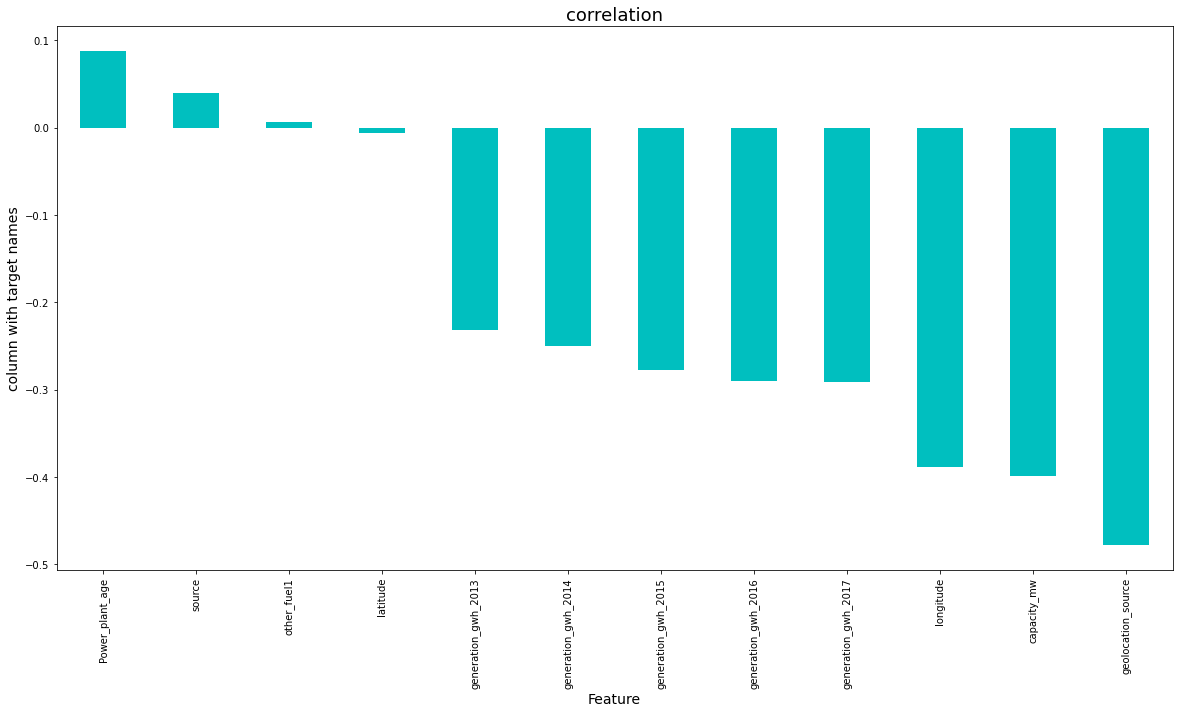

In [71]:
plt.figure(figsize=(20,10))
df_new.corr()['Fuel_type'].sort_values(ascending=False).drop(['Fuel_type']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Latitude and other_fuel1 is very less correlated with Fuel_type1.So i can drop them.

In [72]:
#Droping less correlated column
df_new = df_new.drop(["other_fuel1"],axis=1)
df_new = df_new.drop(["latitude"],axis=1)

# i) Prediction and model building for capacity_mw:

**First let me predict capacity_mw and since capacity_mw is a continuous column so i have to use regression models.**


**Let me consider the data set df_new for this perticular prediction and i'll remove skewness from independent columns.**

# Separating features and label:

In [73]:
x = df_new.drop("capacity_mw",axis=1)
y = df_new["capacity_mw"]

Assigned y as target variable and x as remaining features.

# Checking for skewness:

In [74]:
#Checking for skewness
x.skew()

longitude              0.888694
Fuel_type              0.413982
source                 1.736117
geolocation_source    -2.068499
generation_gwh_2013    3.096648
generation_gwh_2014    2.940976
generation_gwh_2015    2.714988
generation_gwh_2016    2.635667
generation_gwh_2017    2.532066
Power_plant_age        1.209638
dtype: float64

There is skewness in all column except fuel type.geolocation_source and source are categorical columns so no need to remove skewness.

# Removing skewness using yeo-johnson:

In [75]:
#list of skewed features
skew_fea=['longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']

Taking all the columns with skewness as a list with variable skew_fea.

In [76]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

Using yeo-johnson to remove skewness.

In [77]:
#Removing skewness using yeo-johnson
x[skew_fea] = scaler.fit_transform(x[skew_fea].values)

Using yeo-johnson i have removed the skewness.

In [78]:
#Checking skewness after removing skewness
x[skew_fea].skew()

longitude              0.000077
generation_gwh_2013    0.278188
generation_gwh_2014    0.233082
generation_gwh_2015    0.162566
generation_gwh_2016    0.146869
generation_gwh_2017    0.125694
Power_plant_age        0.037747
dtype: float64

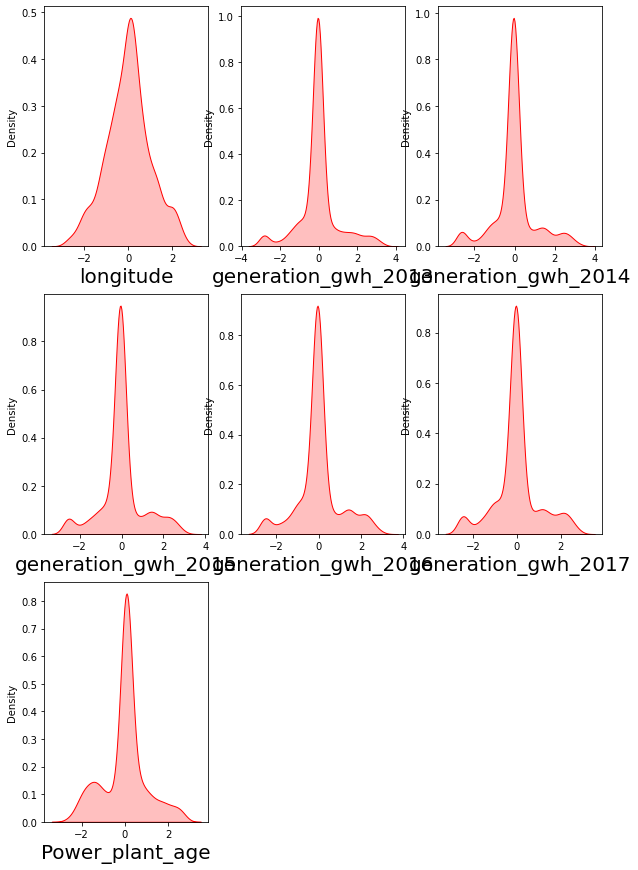

In [79]:
# After removing let's check how the data has been distributed in each column.

plt.figure(figsize=(10,15), facecolor='white')
plotnumber = 1

for column in x[skew_fea]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x[column],color='r',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

It looks like the skewness is removed completely.

# Scaling the data using standard scaler:

In [80]:
#importing necessary libraries
from sklearn.preprocessing import StandardScaler

In [81]:
ssc=StandardScaler()
X = pd.DataFrame(ssc.fit_transform(x), columns=x.columns)

I have scaled my data using standard scaler.

# Using VIF to remove multicolinearity:

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,1.313067,longitude
1,1.687238,Fuel_type
2,1.502947,source
3,1.875104,geolocation_source
4,5.457906,generation_gwh_2013
5,7.210903,generation_gwh_2014
6,6.174992,generation_gwh_2015
7,9.656587,generation_gwh_2016
8,5.196305,generation_gwh_2017
9,1.127725,Power_plant_age


Since all the VIF features are less than 10 so no need to remove any column.

Now the multicolinearity issue is resolved.

# Finding Best Random State and Accuracy:

In [83]:
#importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [84]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestRegressor()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8533189693285541  on Random_state  85


I got the best accuracy and random state.

In [85]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

Created train test split.

# Regression Algorithms:

In [86]:
#importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics

# i) DecisionTreeRegressor:

In [87]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
pred=DTR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.7555544223562758
mean_squared_error: 45205.22571341868
mean_absolute_error: 106.92793638392857
root_mean_squared_error: 212.61520574365954


DTR is giving me 75.55% r2_score.

# ii) RandomForestRegressor:

In [88]:
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)
pred=RFR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8531791515116695
mean_squared_error: 27151.522475174654
mean_absolute_error: 88.94434052932917
root_mean_squared_error: 164.77719039713796


RFR is giving me 85.32% r2_score.

# iii) Gradient Boosting:

In [89]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred=GBR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8413835051782352
mean_squared_error: 29332.88676933963
mean_absolute_error: 92.0676006495045
root_mean_squared_error: 171.26846402458227


GBR is giving me 84.14% r2_score.

# iv) KNN:

In [90]:
knn=KNN()
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8312159885088886
mean_squared_error: 31213.161677207503
mean_absolute_error: 88.30675000000001
root_mean_squared_error: 176.67247006029973


KNN is giving me 83.12% r2_score.

# v) XGB Regressor:

In [91]:
XGB=XGBRegressor()
XGB.fit(X_train,y_train)
pred=XGB.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8463120890462256
mean_squared_error: 28421.445669248464
mean_absolute_error: 88.30087972142735
root_mean_squared_error: 168.58661177343967


XGB is giving me 84.63% r2_score.

# Cross validation score:

In [92]:
print(cross_val_score(DTR,X,y,cv=5).mean())

0.58882644192042


In [93]:
print(cross_val_score(RFR,X,y,cv=5).mean())

0.7730099770653138


In [94]:
print(cross_val_score(GBR,X,y,cv=5).mean())

0.7611530883993523


In [95]:
print(cross_val_score(knn,X,y,cv=5).mean())

0.7417542415978613


In [96]:
print(cross_val_score(XGB,X,y,cv=5).mean())

0.7237881474684974


Above are the cross validation scores of DTR, RFR, GBR, KNN and XGB.

And the difference between model r2_score and cross validation score is less for RandomForestRegressor so RFR is my best model and i have to tune it using RFR parameters.

# Hyper parameter tuning:

In [97]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [98]:
parameter = {'criterion': ['mse','mae'],
            'n_estimators':[100,200,300,400],
            'max_depth': [5,6,7,8],
            'max_features':['auto','sqrt','log2'],
            'bootstrap': [True, False]}

Giving RFR parameters.

In [99]:
GCV=GridSearchCV(RandomForestRegressor(),parameter,cv=5)

In [100]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['mse', 'mae'], 'max_depth': [5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400]})

Tunning the model using GCV.

In [101]:
GCV.best_params_

{'bootstrap': False,
 'criterion': 'mse',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 400}

Got the best parameters for RFR.

In [102]:
Final_mod=RandomForestRegressor(bootstrap=True,criterion='mse',max_depth=8,max_features='log2',n_estimators=400,)
Final_mod.fit(X_train,y_train)
pred=Final_mod.predict(X_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_Score: 85.65764415265438
mean_squared_error: 26523.262952475587
mean_absolute_error: 87.79709561208551
RMSE value: 162.85964187752467


This is my model after tuning.I got 85.66% as r2_score which is gooddd!!!!

# Saving the model:

In [103]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_mod,"Capacity.pkl")

['Capacity.pkl']

# ii) Prediction and model building for Fuel_type:

**Now i have taken target as Fuel_type so i have consider all classification models.**

# Separating features and label:

In [104]:
x_1 = df_new.drop("Fuel_type",axis=1)
y_1 = df_new["Fuel_type"]

Assigned y_1 as target variable and x_1 as remaining features.

# Checking for skewness:

In [105]:
#Checking for skewness
x_1.skew()

capacity_mw            2.134177
longitude              0.888694
source                 1.736117
geolocation_source    -2.068499
generation_gwh_2013    3.096648
generation_gwh_2014    2.940976
generation_gwh_2015    2.714988
generation_gwh_2016    2.635667
generation_gwh_2017    2.532066
Power_plant_age        1.209638
dtype: float64

There is skewness in all column.geolocation_source and source are categorical columns so no need to remove skewness.

# Removing skewness using yeo-johnson:

In [106]:
#list of skewed features
skew_feat=['capacity_mw','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']

Taking all the columns with skewness as a list with variable skew_feat.

In [107]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

Using yeo-johnson to remove skewness.

In [108]:
#Removing skewness using yeo-johnson
x_1[skew_feat] = scaler.fit_transform(x_1[skew_feat].values)

Using yeo-johnson i have removed the skewness.

In [109]:
#Checking skewness after removing skewness
x_1[skew_feat].skew()

capacity_mw            0.013903
longitude              0.000077
generation_gwh_2013    0.278188
generation_gwh_2014    0.233082
generation_gwh_2015    0.162566
generation_gwh_2016    0.146869
generation_gwh_2017    0.125694
Power_plant_age        0.037747
dtype: float64

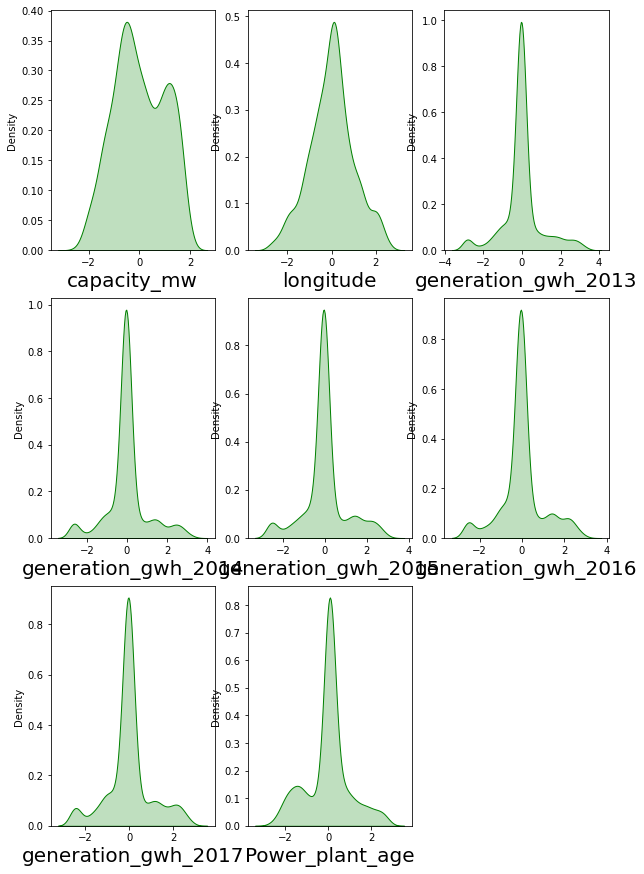

In [111]:
# After removing skewness let's check how the data has been distributed in each column.

plt.figure(figsize=(10,15), facecolor='white')
plotnumber = 1

for column in x_1[skew_feat]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x_1[column],color='g',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Now i can say that skewness in my data is completly removed.

# Scaling the data using standard scaler:

In [112]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_1 = pd.DataFrame(scaler.fit_transform(x_1), columns=x_1.columns)

I have scaled my data using standard scaler.

# Using VIF to remove multicolinearity:

In [113]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif["Features"]=X_1.columns
vif

,vif_Features,Features
0,1.827367,capacity_mw
1,1.199592,longitude
2,1.412236,source
3,1.588651,geolocation_source
4,5.468598,generation_gwh_2013
5,7.212366,generation_gwh_2014
6,6.182418,generation_gwh_2015
7,9.655331,generation_gwh_2016
8,5.231173,generation_gwh_2017
9,1.182482,Power_plant_age


Since all the VIF features are less than 10 so no need to remove any column.

Now the multicolinearity issue is resolved.

# Balancing the target variable using oversampling:

In [114]:
y_1.value_counts()

1    240
3    218
6    126
7    123
2     65
0     50
5     21
4      9
Name: Fuel_type, dtype: int64

In [115]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X_1, y_1 = SM.fit_resample(X_1,y_1)

In [116]:
# Checking the value counts again
y_1.value_counts()

7    240
6    240
5    240
4    240
3    240
2    240
1    240
0    240
Name: Fuel_type, dtype: int64

Now the data is beautifully balanced.

<AxesSubplot:xlabel='Fuel_type', ylabel='count'>

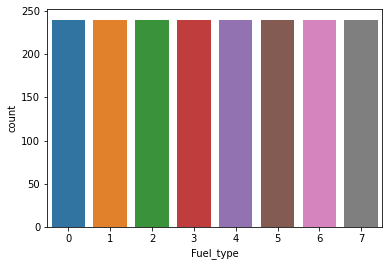

In [117]:
# Visualizing the data after oversampling
sns.countplot(y_1)

Now the target column is balanced.

# Finding Best Random State and Accuracy:

In [118]:
#importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [119]:
from sklearn.tree  import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X_1,y_1,test_size=.30, random_state =i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9010416666666666  on Random_state  149


I got the best accuracy and random state.

In [120]:
x_train,x_test,y_train,y_test=train_test_split(X_1,y_1,test_size=.30,random_state=maxRS)

Created train and test data.

# Classification Algorithms:

In [121]:
#importing necessary libraries.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

# i) DecisionTreeClassifier: 

In [122]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
preddt=DTC.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test, preddt))
print('Confusion Matrix:',confusion_matrix(y_test, preddt))
print(classification_report(y_test,preddt))

Accuracy Score: 0.9027777777777778
Confusion Matrix: [[70  0  0  0  0  0  0  0]
 [ 1 47  5  3  3  3  0  0]
 [ 0  6 52  9  0  2  0  0]
 [ 0 10  5 58  2  1  0  0]
 [ 0  2  0  1 74  0  0  0]
 [ 1  0  2  0  0 68  0  0]
 [ 0  0  0  0  0  0 70  0]
 [ 0  0  0  0  0  0  0 81]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        70
           1       0.72      0.76      0.74        62
           2       0.81      0.75      0.78        69
           3       0.82      0.76      0.79        76
           4       0.94      0.96      0.95        77
           5       0.92      0.96      0.94        71
           6       1.00      1.00      1.00        70
           7       1.00      1.00      1.00        81

    accuracy                           0.90       576
   macro avg       0.90      0.90      0.90       576
weighted avg       0.90      0.90      0.90       576



DTC is giving me 90% accuracy.

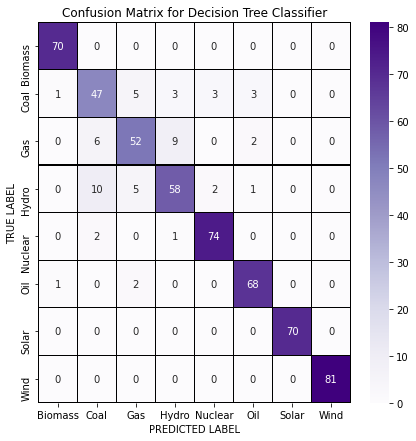

In [123]:
cm = confusion_matrix(y_test, preddt)

x_axis_labels = ["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]
y_axis_labels = ["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

We can see the true values and predicted values in Decision Tree Classifier model using confusion matrix.

# ii) RandomForestClassifier:

In [124]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predrf=RFC.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test, predrf))
print('Confusion Matrix:',confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))

Accuracy Score: 0.9340277777777778
Confusion Matrix: [[70  0  0  0  0  0  0  0]
 [ 0 49  4  4  2  3  0  0]
 [ 0  3 62  0  0  4  0  0]
 [ 0  5  4 62  1  4  0  0]
 [ 0  0  0  1 76  0  0  0]
 [ 0  1  2  0  0 68  0  0]
 [ 0  0  0  0  0  0 70  0]
 [ 0  0  0  0  0  0  0 81]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       0.84      0.79      0.82        62
           2       0.86      0.90      0.88        69
           3       0.93      0.82      0.87        76
           4       0.96      0.99      0.97        77
           5       0.86      0.96      0.91        71
           6       1.00      1.00      1.00        70
           7       1.00      1.00      1.00        81

    accuracy                           0.93       576
   macro avg       0.93      0.93      0.93       576
weighted avg       0.93      0.93      0.93       576



RFC is giving me 93% accuracy.

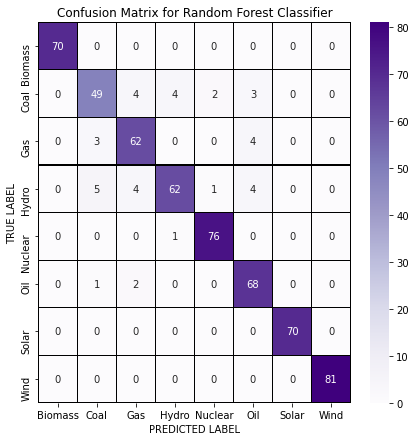

In [125]:
cm = confusion_matrix(y_test, predrf)

x_axis_labels = ["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]
y_axis_labels = ["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

We can see the true values and predicted values in Random Forest Classifier model using confusion matrix.

# iii) SupportVectorClassifier:

In [126]:
SV=SVC()
SV.fit(x_train,y_train)
predsv=SV.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test, predsv))
print('Confusion Matrix:',confusion_matrix(y_test, predsv))
print(classification_report(y_test,predsv))

Accuracy Score: 0.8211805555555556
Confusion Matrix: [[61  0  0  0  0  1  0  8]
 [ 8 36  7  1  3  2  0  5]
 [ 2  2 44  4  0 16  0  1]
 [ 0 10  8 45  1  1  0 11]
 [ 0  1  4  1 71  0  0  0]
 [ 1  0  0  0  0 66  0  4]
 [ 0  0  0  0  0  0 70  0]
 [ 0  0  1  0  0  0  0 80]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        70
           1       0.73      0.58      0.65        62
           2       0.69      0.64      0.66        69
           3       0.88      0.59      0.71        76
           4       0.95      0.92      0.93        77
           5       0.77      0.93      0.84        71
           6       1.00      1.00      1.00        70
           7       0.73      0.99      0.84        81

    accuracy                           0.82       576
   macro avg       0.82      0.82      0.81       576
weighted avg       0.83      0.82      0.82       576



SVC is giving me 82% accuracy.

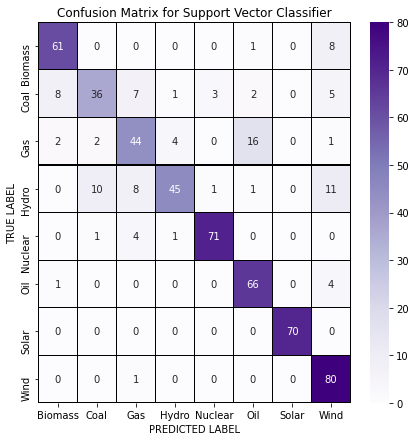

In [127]:
cm = confusion_matrix(y_test, predsv)

x_axis_labels = ["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]
y_axis_labels = ["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Classifier')
plt.show()

We can see the true values and predicted values in Support Vector Classifier model using confusion matrix.

# iv) K-Neighbor Classifier:

In [128]:
knn=KNN()
knn.fit(x_train,y_train)
predkn=knn.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test, predkn))
print('Confusion Matrix:',confusion_matrix(y_test, predkn))
print(classification_report(y_test,predkn))

Accuracy Score: 0.8628472222222222
Confusion Matrix: [[66  1  0  0  0  2  0  1]
 [ 3 37  7  3  4  3  0  5]
 [ 1  5 57  1  0  4  0  1]
 [ 0  8 11 52  0  2  0  3]
 [ 0  0  0  2 75  0  0  0]
 [ 3  0  3  0  0 65  0  0]
 [ 0  0  0  0  0  0 70  0]
 [ 4  0  2  0  0  0  0 75]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        70
           1       0.73      0.60      0.65        62
           2       0.71      0.83      0.77        69
           3       0.90      0.68      0.78        76
           4       0.95      0.97      0.96        77
           5       0.86      0.92      0.88        71
           6       1.00      1.00      1.00        70
           7       0.88      0.93      0.90        81

    accuracy                           0.86       576
   macro avg       0.86      0.86      0.86       576
weighted avg       0.86      0.86      0.86       576



KNN is giving me 86% accuracy.

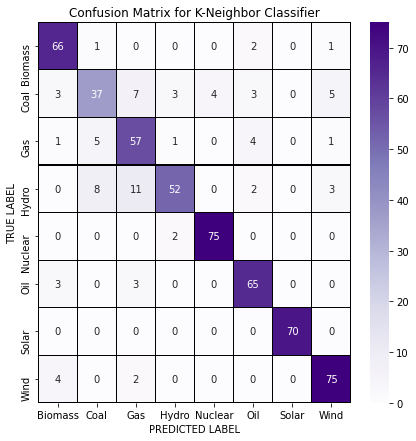

In [129]:
cm = confusion_matrix(y_test, predkn)

x_axis_labels = ["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]
y_axis_labels = ["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for K-Neighbor Classifier')
plt.show()

We can see the true values and predicted values in KNN Classifier model using confusion matrix.

# v) Gradient Boosting Classifier:

In [130]:
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)
predgb=GBC.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test, predgb))
print('Confusion Matrix:',confusion_matrix(y_test, predgb))
print(classification_report(y_test,predgb))

Accuracy Score: 0.9114583333333334
Confusion Matrix: [[67  1  0  0  0  2  0  0]
 [ 0 49  2  3  4  4  0  0]
 [ 0  9 55  3  0  2  0  0]
 [ 0  7  5 60  1  3  0  0]
 [ 0  0  2  0 75  0  0  0]
 [ 1  2  0  0  0 68  0  0]
 [ 0  0  0  0  0  0 70  0]
 [ 0  0  0  0  0  0  0 81]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        70
           1       0.72      0.79      0.75        62
           2       0.86      0.80      0.83        69
           3       0.91      0.79      0.85        76
           4       0.94      0.97      0.96        77
           5       0.86      0.96      0.91        71
           6       1.00      1.00      1.00        70
           7       1.00      1.00      1.00        81

    accuracy                           0.91       576
   macro avg       0.91      0.91      0.91       576
weighted avg       0.91      0.91      0.91       576



GBC is giving me 91% accuracy.

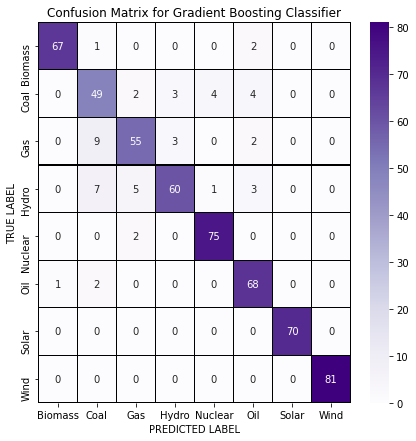

In [131]:
cm = confusion_matrix(y_test, predgb)

x_axis_labels = ["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]
y_axis_labels = ["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

We can see the true values and predicted values in GB Classifier model using confusion matrix.

# Cross Validation Cross:

In [132]:
#Importing library
from sklearn.model_selection import cross_val_score

In [133]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,X_1,y_1,cv=5).mean())

0.8625


In [134]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,X_1,y_1,cv=5).mean())

0.9166666666666666


In [135]:
# cv score for Support Vector  Classifier
print(cross_val_score(SV,X_1,y_1,cv=5).mean())

0.7984375000000001


In [136]:
# cv score for KNN Classifier
print(cross_val_score(knn,X_1,y_1,cv=5).mean())

0.85625


In [137]:
# cv score for Gradient Boosting Classifier
print(cross_val_score(GBC,X_1,y_1,cv=5).mean())

0.8927083333333334


Above are the cross validation scores of DTC,RFC,SVC,KNN and GBC.

By looking into the difference of Model accuracy and cross validation score i found that KNN as best model.

# Hyper Parameter tuning:

In [138]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [139]:
parameter = {'n_neighbors':[1,2,3,4,5,6],     #parameters for KNN classifier
             'weights':['uniform','distance'],
             'leaf_size':[10,100,1000],
             'algorithm':['auto','ball_tree','kd_tree','brute']}

Giving parameters of KNN.

In [140]:
GCV=GridSearchCV(KNN(),parameter,cv=5)

Running grid search CV for KNN.

In [141]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 100, 1000],
                         'n_neighbors': [1, 2, 3, 4, 5, 6],
                         'weights': ['uniform', 'distance']})

Training the model with GCV.

In [142]:
GCV.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 1, 'weights': 'uniform'}

Got the best parameters for KNN.

In [143]:
Final1_mod=KNN(algorithm='auto',leaf_size=10, n_neighbors=1, weights='uniform')
Final1_mod.fit(x_train,y_train)
pred=Final1_mod.predict(x_test)
acc=accuracy_score(y_test, pred)

print(acc*100)

90.10416666666666


After tunning the model with best parameters i got 90.10% accuracy which is good.!!!

# ROC AUC Curve:

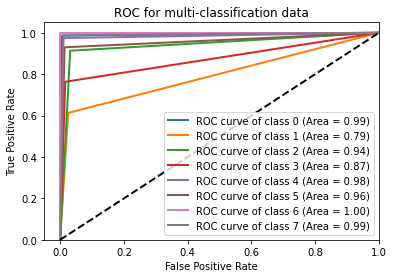

In [144]:
# Plotting ROC curve for all the models
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc

classifier = OneVsRestClassifier(Final1_mod)
y_sco = classifier.fit(x_train, y_train).predict_proba(x_test)

y_test_bin  = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7])
n_classes = 8

false_pr = dict()
true_pr = dict()
roc_auc = dict()
for i in range(n_classes):
    false_pr[i], true_pr[i], _ = roc_curve(y_test_bin[:, i], y_sco[:, i])
    roc_auc[i] = auc(false_pr[i], true_pr[i])
   
for i in range(n_classes):
    plt.plot(false_pr[i], true_pr[i], lw=2,
             label='ROC curve of class {0} (Area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for multi-classification data')
plt.legend(loc="lower right")
plt.show()

Above is the roc curves of all models.And my best model is KNN.

# Saving the model:

In [145]:
#Saving the model as .pkl file
import joblib
joblib.dump(Final1_mod,"Fuel_type.pkl")

['Fuel_type.pkl']

# Thank You:) For Evaluating My Project:)